In [196]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [197]:
df = pd.read_csv("/content/WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [198]:
df.shape

(1143, 13)

In [199]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [201]:
for i in df.columns:
    print(i,df[i].nunique())

fixed acidity 91
volatile acidity 135
citric acid 77
residual sugar 80
chlorides 131
free sulfur dioxide 53
total sulfur dioxide 138
density 388
pH 87
sulphates 89
alcohol 61
quality 6
Id 1143


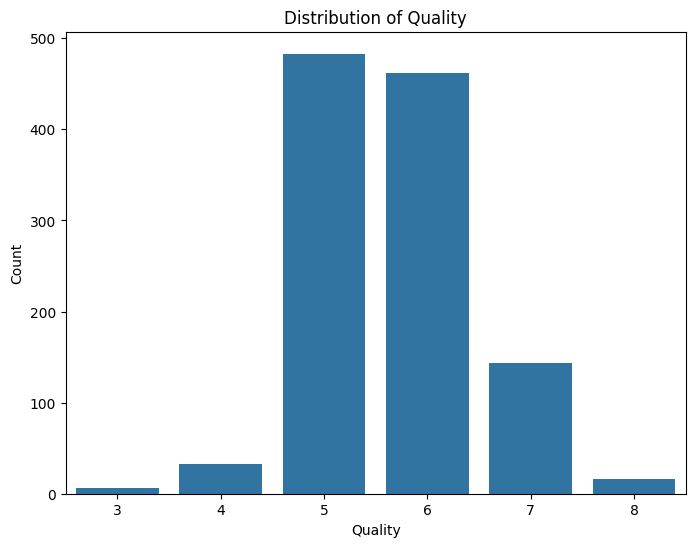

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar chart for the "quality" distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="quality")
plt.title("Distribution of Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()


# **Data Preprocessing**

<Axes: xlabel='alcohol', ylabel='Count'>

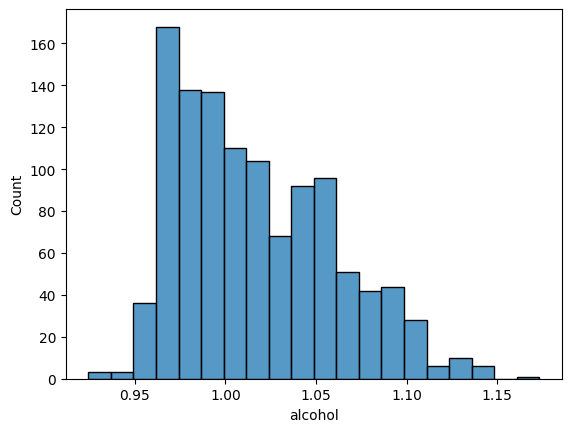

In [203]:
df['alcohol'] = np.log10(df['alcohol'])
sns.histplot(data=df,x=df['alcohol'])

<ipython-input-204-5ec0b641c0dc>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['volatile acidity'], shade=True)


<Axes: xlabel='volatile acidity', ylabel='Density'>

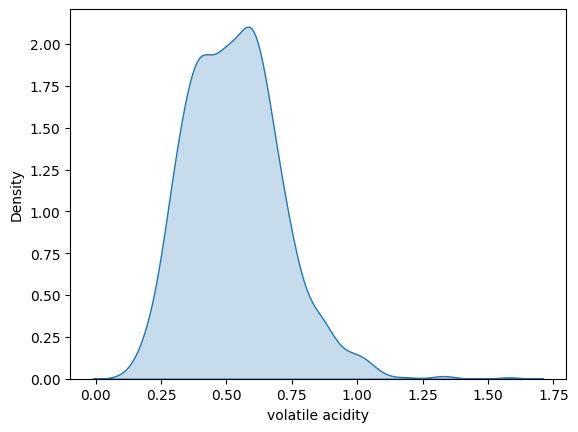

In [204]:
bins = np.arange(0.0, 2.0, 0.05)
df['alcohol']=pd.cut(df['alcohol'],bins=bins)
county_data=pd.get_dummies(df['alcohol'],prefix='alcohol').replace({False:0,True:1})
df=df.join(county_data)
df.drop('alcohol',axis=1,inplace=True)
sns.kdeplot(data=df['volatile acidity'], shade=True)

<ipython-input-205-1b3624544643>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['volatile acidity'], shade=True)


<Axes: xlabel='volatile acidity', ylabel='Density'>

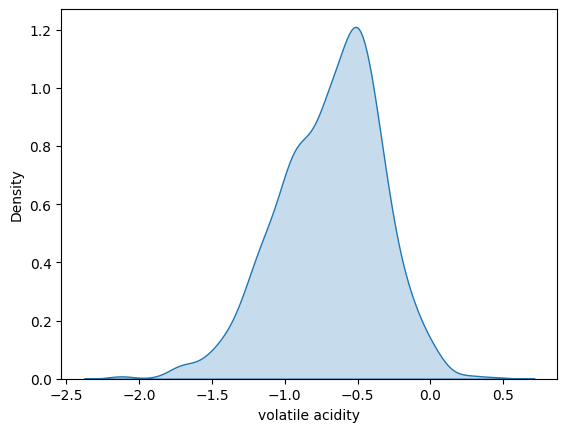

In [205]:
df['volatile acidity'] = np.log(df['volatile acidity'])
sns.kdeplot(data=df['volatile acidity'], shade=True)

In [206]:
bins=np.arange(-10, 2,-2)
df['volatile acidity']=pd.cut(df['volatile acidity'],bins=bins)
county_data=pd.get_dummies(df['volatile acidity'],prefix='volatile acidity').replace({False:0,True:1})
df=df.join(county_data)
df.drop('volatile acidity',axis=1,inplace=True)
df

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,...,"alcohol_(1.45, 1.5]","alcohol_(1.5, 1.55]","alcohol_(1.55, 1.6]","alcohol_(1.6, 1.65]","alcohol_(1.65, 1.7]","alcohol_(1.7, 1.75]","alcohol_(1.75, 1.8]","alcohol_(1.8, 1.85]","alcohol_(1.85, 1.9]","alcohol_(1.9, 1.95]"
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5,...,0,0,0,0,0,0,0,0,0,0
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,5,...,0,0,0,0,0,0,0,0,0,0
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,5,...,0,0,0,0,0,0,0,0,0,0
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,6,...,0,0,0,0,0,0,0,0,0,0
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,6,...,0,0,0,0,0,0,0,0,0,0
1139,6.8,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,6,...,0,0,0,0,0,0,0,0,0,0
1140,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,5,...,0,0,0,0,0,0,0,0,0,0
1141,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,6,...,0,0,0,0,0,0,0,0,0,0


In [207]:
bins=[x for x in range(0,300,50)]
df['total sulfur dioxide']=pd.cut(df['total sulfur dioxide'],bins=bins)
county_data=pd.get_dummies(df['total sulfur dioxide'],prefix='total sulfur dioxide').replace({False:0,True:1})
df=df.join(county_data)
df.drop('total sulfur dioxide',axis=1,inplace=True)
df

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,quality,Id,...,"alcohol_(1.7, 1.75]","alcohol_(1.75, 1.8]","alcohol_(1.8, 1.85]","alcohol_(1.85, 1.9]","alcohol_(1.9, 1.95]","total sulfur dioxide_(0, 50]","total sulfur dioxide_(50, 100]","total sulfur dioxide_(100, 150]","total sulfur dioxide_(150, 200]","total sulfur dioxide_(200, 250]"
0,7.4,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,5,0,...,0,0,0,0,0,1,0,0,0,0
1,7.8,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,5,1,...,0,0,0,0,0,0,1,0,0,0
2,7.8,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,5,2,...,0,0,0,0,0,0,1,0,0,0
3,11.2,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,6,3,...,0,0,0,0,0,0,1,0,0,0
4,7.4,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,5,4,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,6,1592,...,0,0,0,0,0,1,0,0,0,0
1139,6.8,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,6,1593,...,0,0,0,0,0,1,0,0,0,0
1140,6.2,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,5,1594,...,0,0,0,0,0,1,0,0,0,0
1141,5.9,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,6,1595,...,0,0,0,0,0,0,1,0,0,0


In [208]:
# Separate features (X) and target (y)
X = df.drop(columns=['Id', 'quality'])
y = df['quality']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (914, 52)
X_test shape: (229, 52)
y_train shape: (914,)
y_test shape: (229,)


# **Model Training**

In [209]:
def init_params(input_size, hidden_size1, hidden_size2, output_size):
    W1 = np.random.rand(hidden_size1, input_size) - 0.5
    b1 = np.random.rand(hidden_size1, 1) - 0.5
    W2 = np.random.rand(hidden_size2, hidden_size1) - 0.5
    b2 = np.random.rand(hidden_size2, 1) - 0.5
    W3 = np.random.rand(output_size, hidden_size2) - 0.5
    b3 = np.random.rand(output_size, 1) - 0.5
    return W1, b1, W2, b2, W3, b3


In [210]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Subtract the maximum value
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)


def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    num_classes = len(np.unique(Y))
    Y_min = np.min(Y)
    one_hot_Y = np.zeros((num_classes, Y.size))
    one_hot_Y[Y - Y_min, np.arange(Y.size)] = 1
    return one_hot_Y

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_deriv(Z):
    sigmoid_Z = sigmoid(Z)
    return sigmoid_Z * (1 - sigmoid_Z)

def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = np.dot(W1, X.T) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    m = X.shape[0]
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = (1 / m) * np.dot(dZ3, A2.T)
    db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)
    dZ2 = np.dot(W3.T, dZ3) * sigmoid_deriv(Z2)
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * sigmoid_deriv(Z1)
    dW1 = (1 / m) * np.dot(dZ1, X)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    W3 -= alpha * dW3
    b3 -= alpha * db3
    return W1, b1, W2, b2, W3, b3

def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def calculate_f1_score(predictions, Y):
    num_classes = len(np.unique(Y))
    f1_scores = np.zeros(num_classes)

    for i in range(num_classes):
        true_positives = np.sum((predictions == i) & (Y == i))
        false_positives = np.sum((predictions == i) & (Y != i))
        false_negatives = np.sum((predictions != i) & (Y == i))

        precision = true_positives / (true_positives + false_positives + 1e-8)
        recall = true_positives / (true_positives + false_negatives + 1e-8)

        f1_scores[i] = 2 * (precision * recall) / (precision + recall + 1e-8)

    macro_f1_score = np.mean(f1_scores)
    return macro_f1_score

def calculate_loss(predictions, targets):
    if predictions.shape != targets.shape:
        raise ValueError("Predictions and targets have different shapes.")

    loss = np.mean((predictions - targets) ** 2)
    return loss



def gradient_descent(X, Y, alpha, iterations, input_size, hidden_size1, hidden_size2, output_size):
    W1, b1, W2, b2, W3, b3 = init_params(input_size, hidden_size1, hidden_size2, output_size)

    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)

        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:

            predictions = get_predictions(A3)
            accuracy = get_accuracy(predictions, Y)
            f1 = calculate_f1_score(predictions, Y)
            print("Iteration:", i, "Accuracy:", accuracy, 'f1:', f1)



    return W1, b1, W2, b2, W3, b3


input_size = X_train.shape[1]
hidden_size1 = 20
hidden_size2 = 10
output_size = 6
alpha = 0.01     # Learning rate
iterations = 200

W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, y_train, alpha, iterations, input_size, hidden_size1, hidden_size2, output_size)


Iteration: 0 Accuracy: 0.005470459518599562 f1: 0.005341880278668092
Iteration: 10 Accuracy: 0.006564551422319475 f1: 0.0024360535689372017
Iteration: 20 Accuracy: 0.006564551422319475 f1: 0.002173913021833649
Iteration: 30 Accuracy: 0.006564551422319475 f1: 0.002173913021833649
Iteration: 40 Accuracy: 0.006564551422319475 f1: 0.002173913021833649
Iteration: 50 Accuracy: 0.006564551422319475 f1: 0.002173913021833649
Iteration: 60 Accuracy: 0.006564551422319475 f1: 0.002173913021833649
Iteration: 70 Accuracy: 0.006564551422319475 f1: 0.002173913021833649
Iteration: 80 Accuracy: 0.006564551422319475 f1: 0.002173913021833649
Iteration: 90 Accuracy: 0.006564551422319475 f1: 0.002173913021833649
Iteration: 100 Accuracy: 0.006564551422319475 f1: 0.002173913021833649
Iteration: 110 Accuracy: 0.006564551422319475 f1: 0.002173913021833649
Iteration: 120 Accuracy: 0.006564551422319475 f1: 0.002173913021833649
Iteration: 130 Accuracy: 0.006564551422319475 f1: 0.002173913021833649
Iteration: 140 A

7.728665207877461
32.667396061269145
7.728665207877461
3.4157549234135667
7.728665207877461
14.041575492341357
7.728665207877461
1.4704595185995624
1.1028446389496718
30.336980306345733
9.061269146608316
14.041575492341357
14.041575492341357
14.041575492341357
7.728665207877461


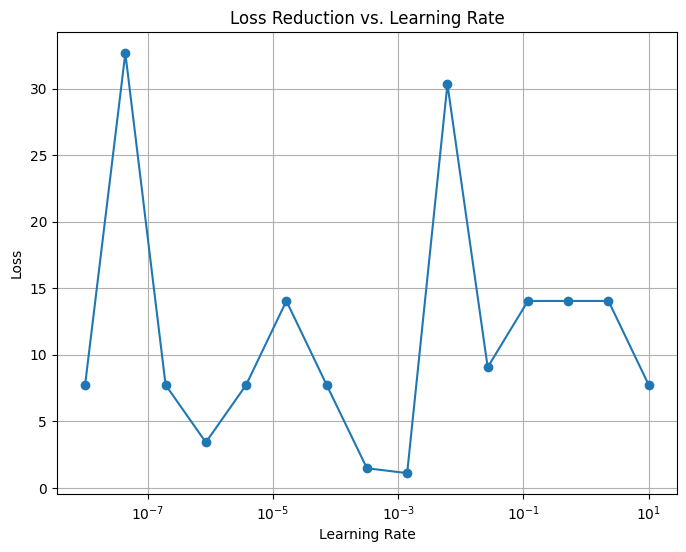

In [217]:
def gradient_descent(X, Y, alpha, iterations, input_size, hidden_size1, hidden_size2, output_size):

  W1, b1, W2, b2, W3, b3 = init_params(input_size, hidden_size1, hidden_size2, output_size)

  for i in range(iterations):
      Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
      dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)

      W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)

      predictions = get_predictions(A3)
  print(calculate_loss(predictions, Y))
  return calculate_loss(predictions, Y)


input_size = X_train.shape[1]
hidden_size1 = 20
hidden_size2 = 10
output_size = 6
learning_rates = np.logspace(-8, 1, num=15)

loss_values =[]
for alpha in learning_rates:
  loss = gradient_descent(X_train, y_train, alpha, 10, input_size, hidden_size1, hidden_size2, output_size)
  loss_values.append(loss)

loss_values
# Plot the loss reduction
plt.figure(figsize=(8, 6))
plt.semilogx(learning_rates, loss_values, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Loss Reduction vs. Learning Rate")
plt.grid(True)
plt.show()

In [212]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A2 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)

test_predictions = make_predictions(X_test, W1, b1, W2, b2, W3, b3)
get_accuracy(test_predictions, y_test)


0.0

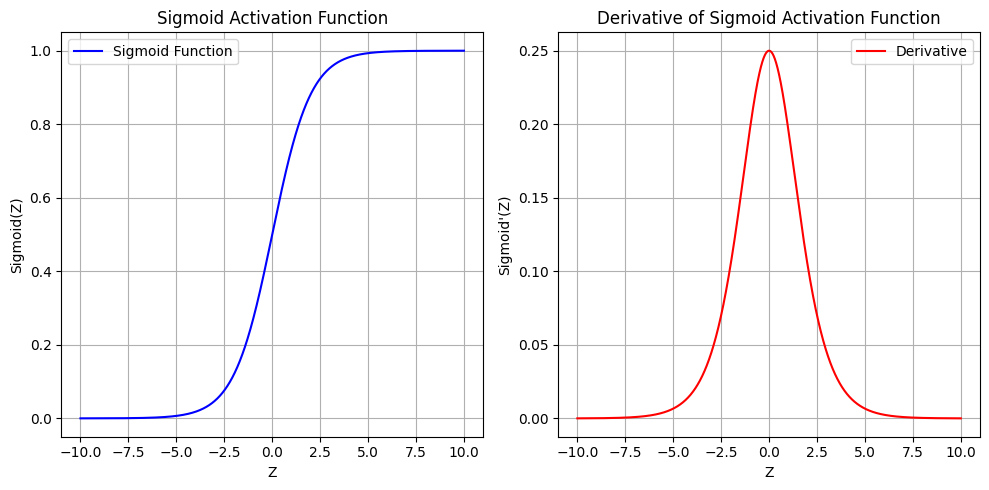

In [219]:
wine_data_flat = df.to_numpy().flatten()

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_deriv(Z):
    sigmoid_Z = sigmoid(Z)
    return sigmoid_Z * (1 - sigmoid_Z)

# Generate a range of values for the input Z
Z = np.linspace(-10, 10, len(wine_data_flat))
# Calculate the sigmoid values for Z
sigmoid_values = sigmoid(Z)
# Calculate the derivative values for Z
sigmoid_deriv_values = sigmoid_deriv(Z)

# Plot the sigmoid function
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(Z, sigmoid_values, label='Sigmoid Function', color='blue')
plt.title('Sigmoid Activation Function')
plt.xlabel('Z')
plt.ylabel('Sigmoid(Z)')
plt.grid(True)
plt.legend()

# Plot the derivative of the sigmoid function
plt.subplot(1, 2, 2)
plt.plot(Z, sigmoid_deriv_values, label='Derivative', color='red')
plt.title('Derivative of Sigmoid Activation Function')
plt.xlabel('Z')
plt.ylabel('Sigmoid\'(Z)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()




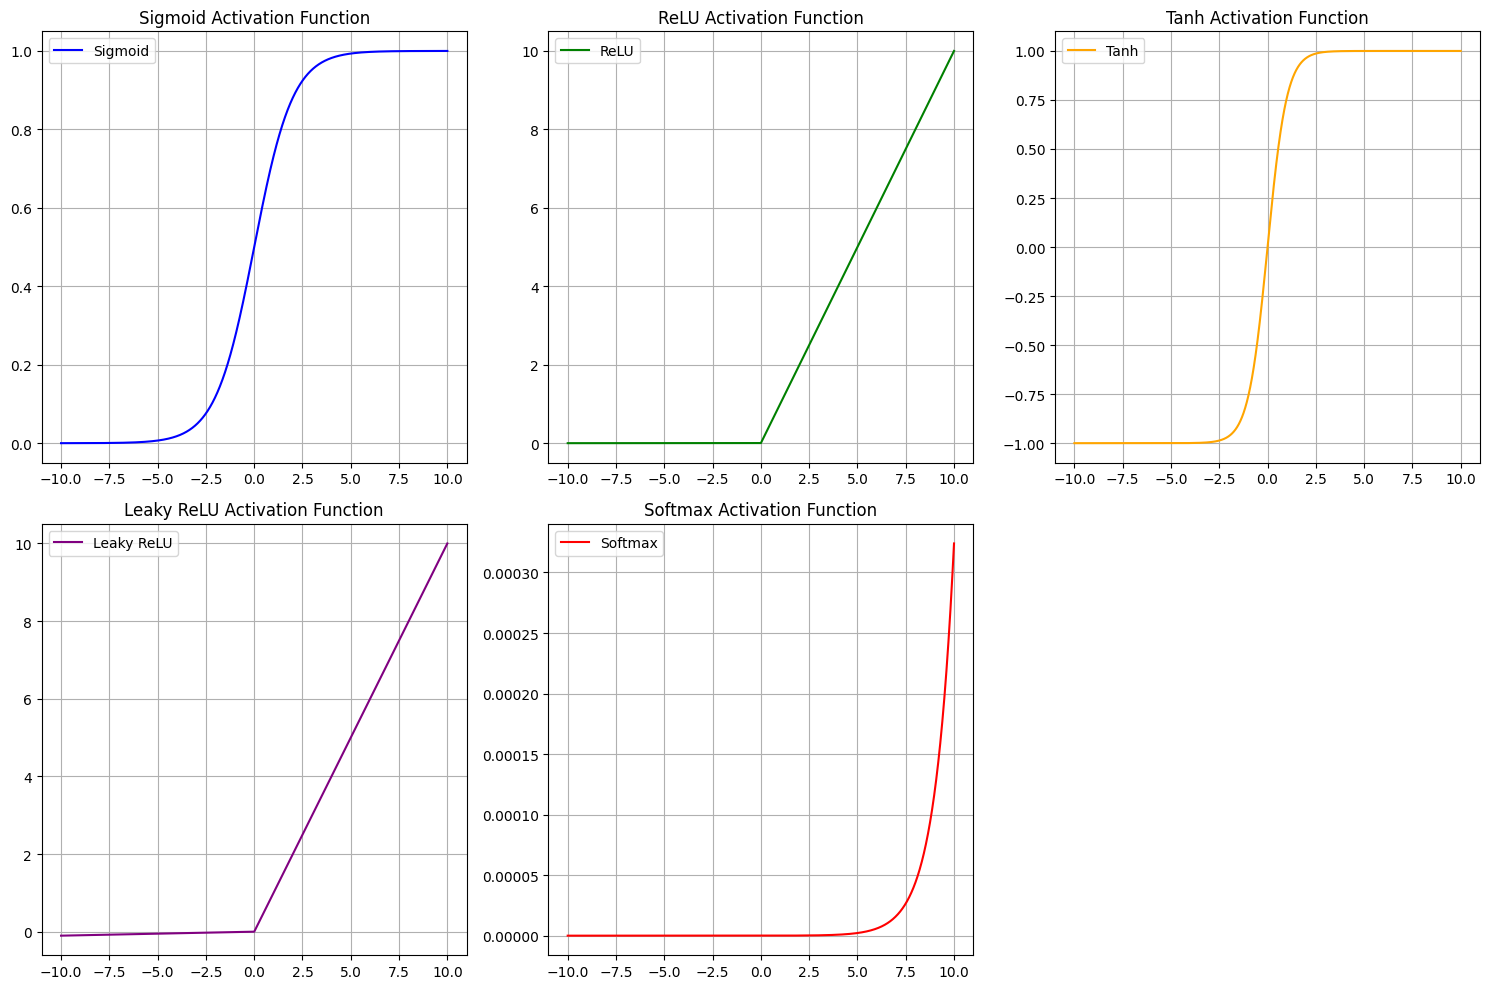

In [222]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of values for the input Z
Z = np.linspace(-10, 10, len(wine_data_flat))

# Define activation functions
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def relu(Z):
    return np.maximum(0, Z)

def tanh(Z):
    return np.tanh(Z)

def leaky_relu(Z, alpha=0.01):
    return np.where(Z > 0, Z, alpha * Z)

def softmax(Z):
    exp_Z = np.exp(Z)
    return exp_Z / np.sum(exp_Z)

# Calculate activation values
sigmoid_values = sigmoid(Z)
relu_values = relu(Z)
tanh_values = tanh(Z)
leaky_relu_values = leaky_relu(Z)
softmax_values = softmax(Z)

# Plot activation functions
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(Z, sigmoid_values, label='Sigmoid', color='blue')
plt.title('Sigmoid Activation Function')
plt.grid(True)
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(Z, relu_values, label='ReLU', color='green')
plt.title('ReLU Activation Function')
plt.grid(True)
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(Z, tanh_values, label='Tanh', color='orange')
plt.title('Tanh Activation Function')
plt.grid(True)
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(Z, leaky_relu_values, label='Leaky ReLU', color='purple')
plt.title('Leaky ReLU Activation Function')
plt.grid(True)
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(Z, softmax_values, label='Softmax', color='red')
plt.title('Softmax Activation Function')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


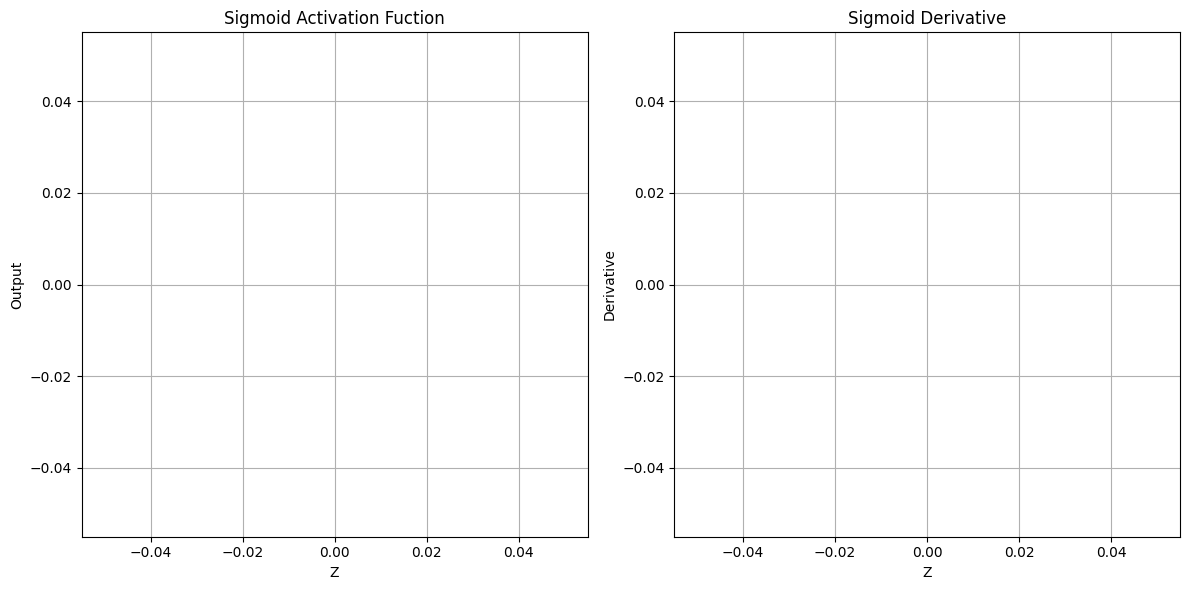

In [223]:
# Assuming you have predictions_test (pre-activation values) from your model
sigmoid_output = sigmoid(predictions_test)
sigmoid_derivative_output = sigmoid_derivative(predictions_test)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(predictions_test, sigmoid_output, label="Sigmoid")
plt.title("Sigmoid Activation Fuction")
plt.xlabel("Z")
plt.ylabel("Output")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(predictions_test, sigmoid_derivative_output, label="Sigmoid Derivative")
plt.title("Sigmoid Derivative")
plt.xlabel("Z")
plt.ylabel("Derivative")
plt.grid()

plt.tight_layout()
plt.show()
